import pandas as pd

df = pd.read_csv("cic_ids_smote03.csv")

In [1]:
import pandas as pd

X_train =pd.read_csv("train_resampled.csv")
X_test =pd.read_csv("test_original.csv")


In [2]:
X_test['Label'].value_counts()

BENIGN              318909
Portscan             31813
DoS Hulk             31694
DDoS                 19029
DoS GoldenEye         1513
FTP-Patator            794
DoS Slowloris          772
SSH-Patator            592
DoS Slowhttptest       348
Name: Label, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
X_train['Label'] = label_encoder.fit_transform(X_train['Label'])
X_test['Label'] = label_encoder.transform(X_test['Label'])

# 인코딩된 데이터프레임 확인
print(X_train['Label'].value_counts())
print(X_test['Label'].value_counts())

0    1275631
1     637815
3     637815
2     637815
7     637815
6     637815
8     637815
5     637815
4     637815
Name: Label, dtype: int64
0    318909
7     31813
3     31694
1     19029
2      1513
6       794
5       772
8       592
4       348
Name: Label, dtype: int64


누적 분산 비율 (cumulative explained variance):
[0.68702037 0.90936756 1.04139328 1.10758136 1.16795454 1.21820822
 1.26714478 1.30769124 1.33635395 1.35984941 1.38141007 1.40150705
 1.41971769 1.43639907 1.45183099 1.46659669 1.48092404 1.4935387
 1.50412219 1.51283793 1.52100327 1.52743345 1.53371422 1.53928407
 1.54456307 1.5486705  1.55216477 1.5553784  1.55835881 1.56100075
 1.56318456 1.56496902 1.56638365 1.5673469  1.56821706 1.56882903
 1.56933052 1.56971313 1.5700578  1.57024734]
Train Label 데이터 타입: int32
Test Label 데이터 타입: int32


C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\matplotlib

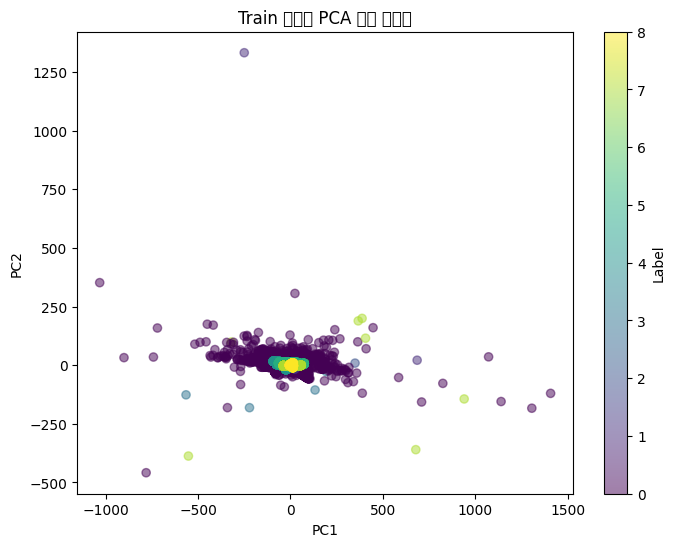

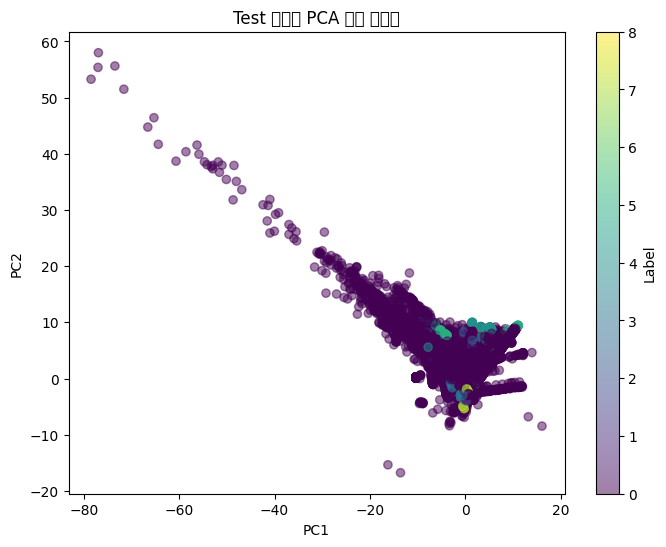

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y_train = X_train['Label']
X_train = X_train.drop(labels='Label',axis=1)
y_test = X_test['Label']
X_test = X_test.drop(labels='Label',axis=1)

# 2. 데이터 스케일링 (Train에서 학습 후, Test에 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Train 데이터에서 fit_transform
X_test_scaled = scaler.transform(X_test)       # Test 데이터에는 transform만 적용

# 3. PCA 학습 및 변환 (Train에서 학습 후, Test에 동일한 PCA 적용)
n_components = 40  # 원하는 차원 수 설정
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled)  # Train 데이터에서 PCA 학습
X_test_pca = pca.transform(X_test_scaled)        # Test 데이터에 같은 PCA 적용

# 4. PCA 누적 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("누적 분산 비율 (cumulative explained variance):")
print(explained_variance_ratio)

# 5. PCA 결과를 DataFrame으로 변환하고 label 병합
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

df_train_merged = X_train_pca_df.assign(label=y_train.values)
df_test_merged = X_test_pca_df.assign(label=y_test.values)

# 6. Label 데이터 타입 확인
print("Train Label 데이터 타입:", df_train_merged['label'].dtype)
print("Test Label 데이터 타입:", df_test_merged['label'].dtype)

# 7. 정렬 여부 확인
assert np.array_equal(y_train.values, df_train_merged['label'].values), "Train Label 순서 불일치!"
assert np.array_equal(y_test.values, df_test_merged['label'].values), "Test Label 순서 불일치!"

# 8. PCA 결과 시각화 (2D로 줄인 경우)
if n_components >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Train 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Test 데이터 PCA 결과 시각화')
    plt.colorbar(label='Label')
    plt.show()


In [5]:
df_train_merged.shape

(6378151, 41)

In [6]:
df_test_merged.shape

(405464, 41)

In [7]:
df_train_merged.to_csv("D:/dataset/0219_Paper_Dataset/train_pca.csv", index=False)
df_test_merged.to_csv("D:/dataset/0219_Paper_Dataset/test_pca.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap  # UMAP 라이브러리

# 1. 데이터 로드 및 전처리
tmp = df.drop(labels='Label', axis=1)
labels = df['Label']

# 2. 데이터 스케일링 (t-SNE & UMAP은 거리 기반이므로 꼭 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tmp)

# 3. t-SNE 변환
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# 4. UMAP 변환
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_reducer.fit_transform(X_scaled)

# 5. 변환된 데이터를 DataFrame으로 변환
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Label'] = labels

df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['Label'] = labels

# 6. t-SNE 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=df_tsne['Label'], palette='viridis', alpha=0.6, data=df_tsne)
plt.title('t-SNE 결과 시각화')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Label', bbox_to_anchor=(1, 1))
plt.show()

# 7. UMAP 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue=df_umap['Label'], palette='viridis', alpha=0.6, data=df_umap)
plt.title('UMAP 결과 시각화')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Label', bbox_to_anchor=(1, 1))
plt.show()
